### Problem 1: Lab 3.6

#### 3.6.1 Libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [16]:
data = pd.read_csv('Boston.csv')

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


#### 3.6.2 Simple Linear Regression

In [34]:
# Display the head of data
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [35]:
#Linear Regression
lm = sm.OLS.from_formula('medv~lstat', data)
result = lm.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Wed, 09 Feb 2022   Prob (F-statistic):           5.08e-88
Time:                        10:00:36   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
#Confidence Interval
result.conf_int()

,0,1
Intercept,33.448457,35.659225
lstat,-1.026148,-0.873951


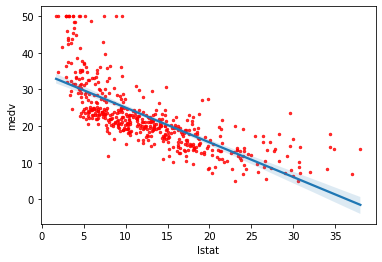

In [37]:
#Plot regression line and scatter plot in seaborn
sns.regplot(data.lstat, data.medv, scatter_kws={'color':'r', 's':6})

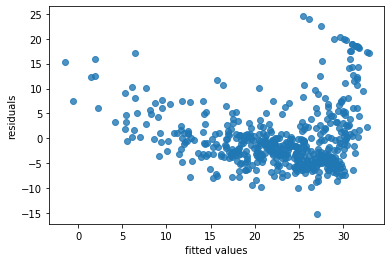

In [38]:
#Residual against fitted values
x = pd.Series(result.fittedvalues, name = 'fitted values')
y = pd.Series(result.resid, name = 'residuals')
sns.regplot(x, y, fit_reg = False)

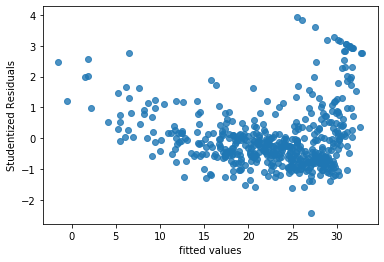

In [39]:
#Studentized residuals
studentized_residuals = pd.Series(result.resid_pearson, name="Studentized Residuals")
sns.regplot(x, studentized_residuals,  fit_reg=False)

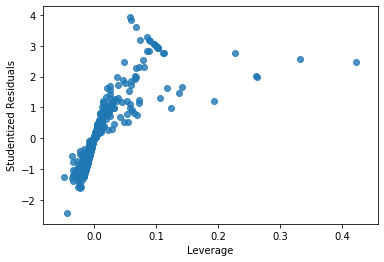

In [40]:
#Leverage plot
from statsmodels.stats.outliers_influence import OLSInfluence
leverage = pd.Series(OLSInfluence(result).influence, name = "Leverage")
sns.regplot(leverage, studentized_residuals,fit_reg=False)

In [41]:
#prediction
new = pd.DataFrame([[1, 10], [1, 15], [1, 20]], columns=['Intercept', 'lstat'])
preds = result.get_prediction(new)
preds.summary_frame(0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,25.053347,0.294814,24.474132,25.632563,12.827626,37.279068
1,20.303101,0.290893,19.731588,20.874613,8.077742,32.528459
2,15.552854,0.396656,14.773550,16.332157,3.316021,27.789687


#### 3.6.3 Multiple Linear Regression

In [43]:
result = sm.OLS.from_formula('medv ~ lstat + age', data).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Wed, 09 Feb 2022   Prob (F-statistic):           2.98e-88
Time:                        10:14:00   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.2228      0.731     45.458      0.000      31.787      34.659
lstat         -1.0321      0.048    -21.416      0.000      -1.127      -0.937
age            0.0345      0.012      2.826      0.005       0.011       0.059
==============================================================================
Omnibus:                      124.288   Durbin-Watson:                   0.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.026
Skew:                           1.362   Prob(JB):                     1.02e-53
Kurtosis:                       5.038   Cond. No.                         201.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
# Regress on all 13 predictiors
result = sm.OLS(data.medv, data.drop('medv', axis = 1)).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   medv   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              891.3
Date:                Wed, 09 Feb 2022   Prob (F-statistic):                        0.00
Time:                        10:15:21   Log-Likelihood:                         -1523.8
No. Observations:                 506   AIC:                                      3074.
Df Residuals:                     493   BIC:                                      3128.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
crim          -0.0929      0.034     -2.699      0.007      -0.161      -0.025
zn             0.0487      0.014      3.382      0.001       0.020       0.077
indus         -0.0041      0.064     -0.063      0.950      -0.131       0.123
chas           2.8540      0.904      3.157      0.002       1.078       4.630
nox           -2.8684      3.359     -0.854      0.394      -9.468       3.731
rm             5.9281      0.309     19.178      0.000       5.321       6.535
age           -0.0073      0.014     -0.526      0.599      -0.034       0.020
dis           -0.9685      0.196     -4.951      0.000      -1.353      -0.584
rad            0.1712      0.067      2.564      0.011       0.040       0.302
tax           -0.0094      0.004     -2.395      0.017      -0.017      -0.002
ptratio       -0.3922      0.110     -3.570      0.000      -0.608      -0.176
black          0.0149      0.003      5.528      0.000       0.010       0.020
lstat         -0.4163      0.051     -8.197      0.000      -0.516      -0.317
==============================================================================
Omnibus:                      204.082   Durbin-Watson:                   0.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1374.225
Skew:                           1.609   Prob(JB):                    3.90e-299
Kurtosis:                      10.404   Cond. No.                     8.50e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
# Drop age
result = sm.OLS(data.medv, data.drop(['medv', 'age'], axis=1)).fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   medv   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              967.0
Date:                Wed, 09 Feb 2022   Prob (F-statistic):                        0.00
Time:                        10:21:11   Log-Likelihood:                         -1523.9
No. Observations:                 506   AIC:                                      3072.
Df Residuals:                     494   BIC:                                      3123.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
crim          -0.0929      0.034     -2.700      0.007      -0.160      -0.025
zn             0.0496      0.014      3.476      0.001       0.022       0.078
indus         -0.0043      0.064     -0.066      0.947      -0.131       0.122
chas           2.8308      0.902      3.138      0.002       1.058       4.603
nox           -3.3322      3.239     -1.029      0.304      -9.695       3.031
rm             5.8941      0.302     19.514      0.000       5.301       6.488
dis           -0.9330      0.183     -5.085      0.000      -1.293      -0.572
rad            0.1731      0.067      2.598      0.010       0.042       0.304
tax           -0.0094      0.004     -2.408      0.016      -0.017      -0.002
ptratio       -0.3942      0.110     -3.593      0.000      -0.610      -0.179
black          0.0148      0.003      5.515      0.000       0.010       0.020
lstat         -0.4252      0.048     -8.883      0.000      -0.519      -0.331
==============================================================================
Omnibus:                      200.402   Durbin-Watson:                   1.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1313.159
Skew:                           1.584   Prob(JB):                    7.10e-286
Kurtosis:                      10.228   Cond. No.                     8.14e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.14e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### 3.6.4 Interaction Term

In [47]:
sm.OLS.from_formula('medv ~ lstat*age', data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Wed, 09 Feb 2022   Prob (F-statistic):           4.86e-88
Time:                        10:22:09   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.000      33.201      38.976
lstat         -1.3921      0.167     -8.313      0.000      -1.721      -1.063
age           -0.0007      0.020     -0.036      0.971      -0.040       0.038
lstat:age      0.0042      0.002      2.244      0.025       0.001       0.008
==============================================================================
Omnibus:                      135.601   Durbin-Watson:                   0.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              296.955
Skew:                           1.417   Prob(JB):                     3.29e-65
Kurtosis:                       5.461   Cond. No.                     6.88e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### 3.6.5 Nonlinear Transformation

In [48]:
lm.fit2 = sm.OLS.from_formula('medv ~ lstat + np.square(lstat)', data).fit()
lm.fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          1.56e-112
Time:                        10:30:22   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           42.8620      0.872     49.149      0.000      41.149      44.575
lstat               -2.3328      0.124    -18.843      0.000      -2.576      -2.090
np.square(lstat)     0.0435      0.004     11.628      0.000       0.036       0.051
==============================================================================
Omnibus:                      107.006   Durbin-Watson:                   0.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.388
Skew:                           1.128   Prob(JB):                     2.55e-50
Kurtosis:                       5.397   Cond. No.                     1.13e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
# Use anova to further compare two models
lm.fit = sm.OLS.from_formula('medv ~ lstat', data).fit()
sm.stats.anova_lm(lm.fit, lm.fit2)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,504.0,19472.381418,0.0,NaN,NaN,NaN
1,503.0,15347.243158,1.0,4125.13826,135.199822,7.630116e-28


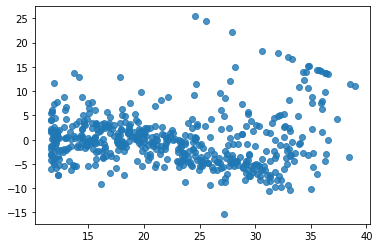

In [50]:
# residual plot
sns.regplot(lm.fit2.fittedvalues, lm.fit2.resid, fit_reg=False)

In [52]:
#5 order polynomial
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=5)
x = data.lstat.values.reshape(-1,1)
xp = polynomial_features.fit_transform(x)
sm.OLS(data.medv, xp).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     214.2
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          8.73e-122
Time:                        10:36:23   Log-Likelihood:                -1550.6
No. Observations:                 506   AIC:                             3113.
Df Residuals:                     500   BIC:                             3139.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         67.6997      3.604     18.783      0.000      60.618      74.781
x1           -11.9911      1.526     -7.859      0.000     -14.989      -8.994
x2             1.2728      0.223      5.703      0.000       0.834       1.711
x3            -0.0683      0.014     -4.747      0.000      -0.097      -0.040
x4             0.0017      0.000      4.143      0.000       0.001       0.003
x5         -1.632e-05   4.42e-06     -3.692      0.000    -2.5e-05   -7.63e-06
==============================================================================
Omnibus:                      144.085   Durbin-Watson:                   0.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              494.545
Skew:                           1.292   Prob(JB):                    4.08e-108
Kurtosis:                       7.096   Cond. No.                     1.37e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### 3.6.6 Qualitative Predictors

In [54]:
carseats = pd.read_csv('carseats.csv')
carseats

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [55]:
sm.OLS.from_formula('Sales ~ Income:Advertising+Price:Age + ' + '+'.join(carseats.columns.drop('Sales')), carseats).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     210.0
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          6.14e-166
Time:                        10:47:21   Log-Likelihood:                -564.67
No. Observations:                 400   AIC:                             1157.
Df Residuals:                     386   BIC:                             1213.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               6.5756      1.009      6.519      0.000       4.592       8.559
ShelveLoc[T.Good]       4.8487      0.153     31.724      0.000       4.548       5.149
ShelveLoc[T.Medium]     1.9533      0.126     15.531      0.000       1.706       2.201
Urban[T.Yes]            0.1402      0.112      1.247      0.213      -0.081       0.361
US[T.Yes]              -0.1576      0.149     -1.058      0.291      -0.450       0.135
Income:Advertising      0.0008      0.000      2.698      0.007       0.000       0.001
Price:Age               0.0001      0.000      0.801      0.424      -0.000       0.000
CompPrice               0.0929      0.004     22.567      0.000       0.085       0.101
Income                  0.0109      0.003      4.183      0.000       0.006       0.016
Advertising             0.0702      0.023      3.107      0.002       0.026       0.115
Population              0.0002      0.000      0.433      0.665      -0.001       0.001
Price                  -0.1008      0.007    -13.549      0.000      -0.115      -0.086
Age                    -0.0579      0.016     -3.633      0.000      -0.089      -0.027
Education              -0.0209      0.020     -1.063      0.288      -0.059       0.018
==============================================================================
Omnibus:                        1.281   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.527   Jarque-Bera (JB):                1.147
Skew:                           0.129   Prob(JB):                        0.564
Kurtosis:                       3.050   Cond. No.                     1.31e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Questions for lab

#### Q1

When only using lstat as a predictor, the residuals demonstrate a negative pattern when fitted value increases. Also the variance of residual seems to become larger. **However**, when we use the square of lstat, there is not a strong pattern existing.

#### Q2

It might defer because according to ISLR, "the poly() function orthogonalizes the predictors: this means that the features output by this function are not simply a sequence of powers of the argument". But Python does not do this.




### Problem 2: EDA

In [111]:
spam = pd.read_csv('spam.csv')

In [65]:
spam.head()

,isuid,id,day of week,time of day,size.kb,box,domain,local,digits,name,...,special,credit,sucker,porn,chain,username,large text,spampct,category,spam
0,1,1,Thu,0,7,no,com,no,0,name,...,1,no,no,no,no,no,no,NaN,news,no
1,1,2,Thu,0,2,no,com,no,0,name,...,5,no,no,no,no,no,no,NaN,com,yes
2,1,3,Thu,14,3,no,edu,yes,0,name,...,2,no,no,no,yes,no,no,13.0,list,no
3,1,4,Thu,3,3,yes,de,no,0,name,...,0,no,no,no,no,no,no,NaN,ord,no
4,1,5,Thu,3,4,no,uk,no,0,name,...,2,no,no,no,no,no,no,NaN,list,no


#### Q1

The variable of interest is **spam**. It will be either 'yes' or 'no' 

#### Q2

Explore relationship between independent and dependent variable

In [69]:
#Get data types, we can distinguish which are categorical/ordinal variables
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2171 entries, 0 to 2170
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   isuid        2171 non-null   int64  
 1   id           2171 non-null   int64  
 2   day of week  2171 non-null   object 
 3   time of day  2171 non-null   int64  
 4   size.kb      2171 non-null   int64  
 5   box          2171 non-null   object 
 6   domain       2171 non-null   object 
 7   local        2171 non-null   object 
 8   digits       2171 non-null   int64  
 9   name         2171 non-null   object 
 10  cappct       2171 non-null   float64
 11  special      2171 non-null   int64  
 12  credit       2171 non-null   object 
 13  sucker       2171 non-null   object 
 14  porn         2171 non-null   object 
 15  chain        2171 non-null   object 
 16  username     2171 non-null   object 
 17  large text   2171 non-null   object 
 18  spampct      818 non-null    float64
 19  catego

In [66]:
# get the number of null values
spam.isna().sum()

isuid             0
id                0
day of week       0
time of day       0
size.kb           0
box               0
domain            0
local             0
digits            0
name              0
cappct            0
special           0
credit            0
sucker            0
porn              0
chain             0
username          0
large text        0
spampct        1353
category          0
spam              0
dtype: int64

From here, **spampct** has lots of null values (1353/2171). Therefore, we should drop the column when we use ML

In [72]:
#Now no null values
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2171 entries, 0 to 2170
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   isuid        2171 non-null   int64  
 1   id           2171 non-null   int64  
 2   day of week  2171 non-null   object 
 3   time of day  2171 non-null   int64  
 4   size.kb      2171 non-null   int64  
 5   box          2171 non-null   object 
 6   domain       2171 non-null   object 
 7   local        2171 non-null   object 
 8   digits       2171 non-null   int64  
 9   name         2171 non-null   object 
 10  cappct       2171 non-null   float64
 11  special      2171 non-null   int64  
 12  credit       2171 non-null   object 
 13  sucker       2171 non-null   object 
 14  porn         2171 non-null   object 
 15  chain        2171 non-null   object 
 16  username     2171 non-null   object 
 17  large text   2171 non-null   object 
 18  category     2171 non-null   object 
 19  spam  

Then we get overall summary statistics

In [73]:
#Firstly, get summary statistics
spam.describe()

,isuid,id,time of day,size.kb,digits,cappct,special
count,2171.000000,2171.000000,2171.000000,2171.000000,2171.000000,2171.000000,2171.000000
mean,9.234454,201.187471,12.260709,16.489636,0.590972,0.158434,1.397052
std,5.678956,640.335487,5.651004,80.557683,2.528618,0.168419,2.323566
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,33.000000,9.000000,2.000000,0.000000,0.060000,0.000000
50%,9.000000,62.000000,12.000000,4.000000,0.000000,0.128000,1.000000
75%,14.000000,108.000000,16.000000,7.000000,0.000000,0.200000,2.000000
max,19.000000,3470.000000,23.000000,1337.000000,23.000000,1.000000,35.000000


**Then come to the relationship between independent and dependent variables**

Firstly, no need to look at isuid and id because they demonstrate useless information

We first look at categorical variables

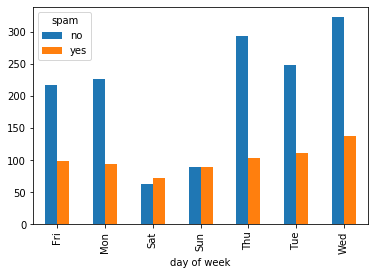

In [77]:
#day of week
pd.crosstab(index=spam['day of week'],columns=spam['spam']).plot.bar()

From above barplot, the percentage of messages which are spam actually has something to do with day of week

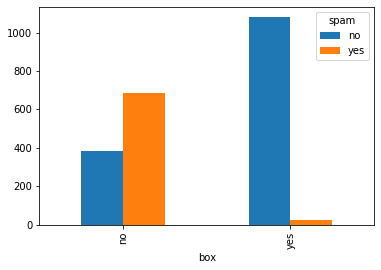

In [79]:
#box
pd.crosstab(index=spam['box'],columns=spam['spam']).plot.bar()

Here when the box is 'yes', there would be only extremely little spam information. This makes sense because box is 'yes' when the sender is known. 

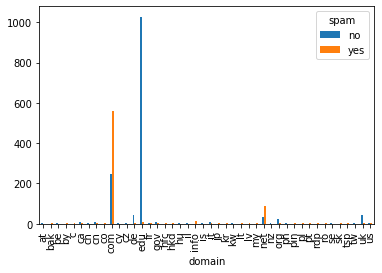

In [80]:
#domain
pd.crosstab(index=spam['domain'],columns=spam['spam']).plot.bar()

From here, we can see major spam messages come from **.com** and **.net**.

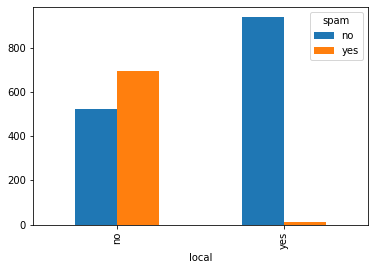

In [81]:
#local
pd.crosstab(index=spam['local'],columns=spam['spam']).plot.bar()

This plot shows spam messages mainly come from non-local domains

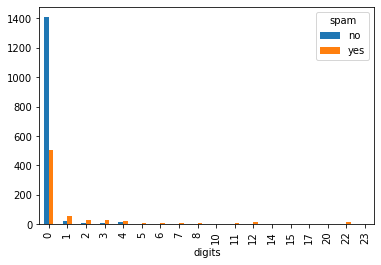

In [82]:
#digits
pd.crosstab(index=spam['digits'],columns=spam['spam']).plot.bar()

This just shows most email users do not have digit in their names

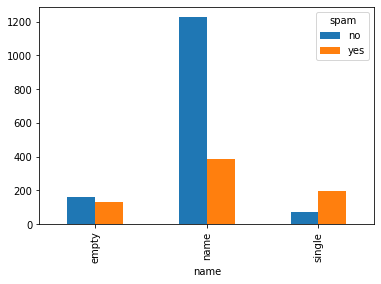

In [84]:
#name
pd.crosstab(index=spam['name'],columns=spam['spam']).plot.bar()

This shows if name is 'single' , the information is more likely to be spam

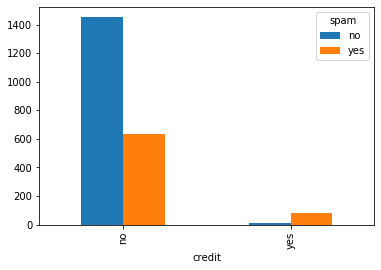

In [85]:
#credit
pd.crosstab(index=spam['credit'],columns=spam['spam']).plot.bar()

This shows if subject line includes one of mortgage, sale, approve, credit, the message is highly likely to be spam

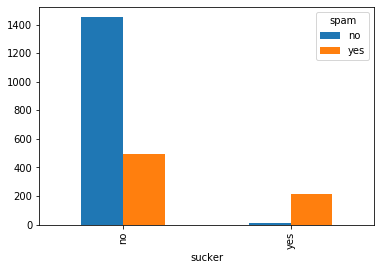

In [86]:
#sucker
pd.crosstab(index=spam['sucker'],columns=spam['spam']).plot.bar()

This shows if subject line includes one of the words earn, free, save, it is mostly likely to be spam

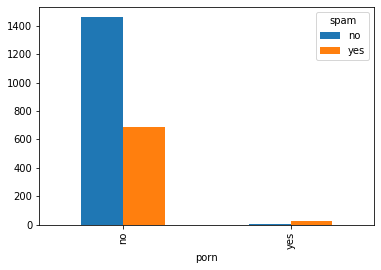

In [87]:
#porn
pd.crosstab(index=spam['porn'],columns=spam['spam']).plot.bar()

Although if subject line includes one of nude, sex, enlarge, improve, it is likely to be spam, this kind of message is small in number

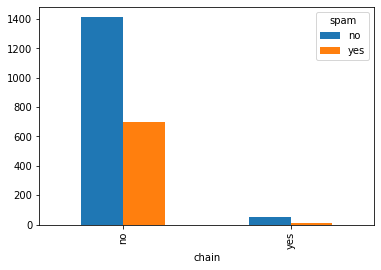

In [88]:
#chain
pd.crosstab(index=spam['chain'],columns=spam['spam']).plot.bar()

If subject includes forward, help, it is less likely to be a spam. But the pattern is not very useful because a very small number of samples have 'yes' for chain.

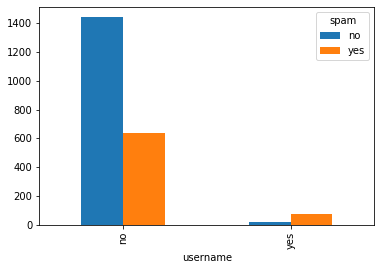

In [89]:
#username
pd.crosstab(index=spam['username'],columns=spam['spam']).plot.bar()

if subject includes recipient’s name or login, it is very likely to be spam. But due to the small number of 'yes', it is also not very useful

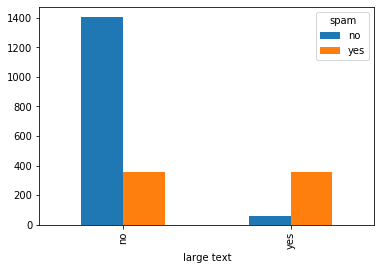

In [91]:
#large.txt
pd.crosstab(index=spam['large text'],columns=spam['spam']).plot.bar()

Large font implies a larger likelihood for spam

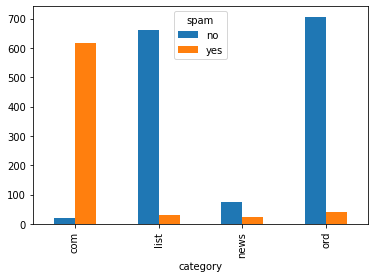

In [92]:
#category
pd.crosstab(index=spam['category'],columns=spam['spam']).plot.bar()

We can see 'com' has extremely high likelihood to be spam information

**After plotting categorical variables**, let's get plots for numerical variables with dependent variable

They are  *time of day, size.kb, cappct, special.* For digits, because it has less unique values, I plotted it above

In [93]:
num = spam[['time of day','size.kb','cappct','special','spam']]

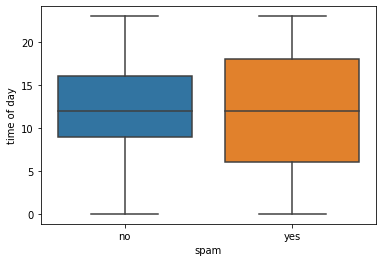

In [103]:
#time of day
sns.boxplot('spam', 'time of day', data = spam)

From the box plot, we can see the range of time of day would be higher for spam information, but the median is similar.

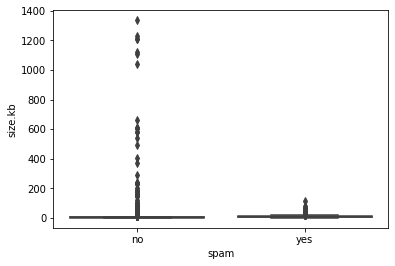

In [107]:
#size.kb
sns.boxplot('spam', 'size.kb', data = spam)

Spam information tends to be smaller in size with fewer outliers

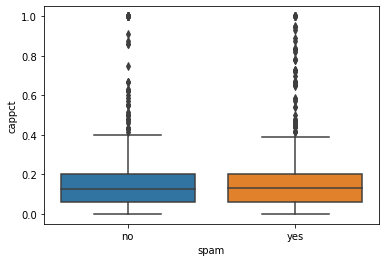

In [108]:
#cappct
sns.boxplot('spam', 'cappct', data = spam)

From the plot, I cannot see significant correlation

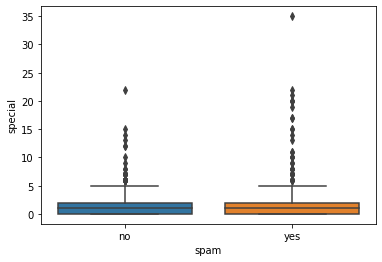

In [109]:
#special
sns.boxplot('spam', 'special', data = spam)

Also no significant pattern exists for special

**Until now**, all variables are examined

#### Q3 
**(a)** In Q2, I already get there are 1353 missing values

**(b)** plot as following

In [115]:
pct_na = spam[spam['spampct'].isna()]
pct_nona = spam[spam['spampct'].notna()]

In [146]:
from matplotlib import pyplot as plt
v = pct_na['time of day'].value_counts()
v = pd.DataFrame(v)
u = pct_nona['time of day'].value_counts()
u = pd.DataFrame(u)

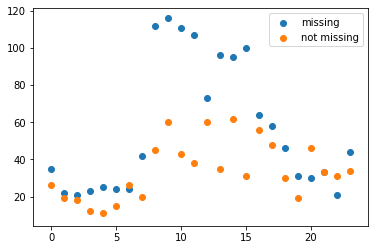

In [149]:
plt.scatter(v.index,v['time of day'])
plt.scatter(u.index,u['time of day'])
plt.legend(['missing','not missing'])

From above plot, when time drops in working hours, there are more samples missing **spampct**. Therefore, the missing actually has a pattern

**(c)**

Text(0.5, 0, 'spampct')

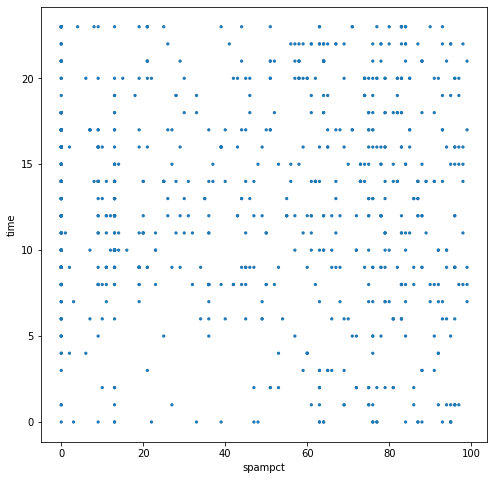

In [175]:
plt.figure(figsize=(8, 8))
plt.scatter(spam['spampct'], spam['time of day'], sizes = [5,5])
plt.ylabel('time')
plt.xlabel('spampct')

The scatter plot is demonstrated above. However, it is not very informative because time of day is not continuous enough. And the above plot has so many points. I use below iteration to calculate its total number as **465**

In [174]:
dic = dict()
count = 0
for a, b in zip(pct_nona['time of day'], pct_nona['spampct']):
    if (a,b) in dic.keys():
        continue
    else:
        dic[(a,b)] = 1
        count += 1
print(count)

465


To make the plot more informative, we can use different color to demonstrate the count of a specific point. 

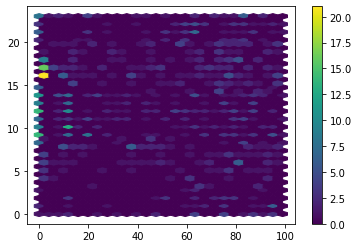

In [180]:
plt.hexbin(spam['spampct'], spam['time of day'], gridsize=(25,25))
plt.colorbar()

### Problem 3  Exploring the Relationship between Overfitting and Noise

**(a)** create a vector x

In [3]:
np.random.seed(1)
x = np.random.randn(100)
x

array([ 1.62434536, -0.61175641, -0.52817175, -1.07296862,  0.86540763,
       -2.3015387 ,  1.74481176, -0.7612069 ,  0.3190391 , -0.24937038,
        1.46210794, -2.06014071, -0.3224172 , -0.38405435,  1.13376944,
       -1.09989127, -0.17242821, -0.87785842,  0.04221375,  0.58281521,
       -1.10061918,  1.14472371,  0.90159072,  0.50249434,  0.90085595,
       -0.68372786, -0.12289023, -0.93576943, -0.26788808,  0.53035547,
       -0.69166075, -0.39675353, -0.6871727 , -0.84520564, -0.67124613,
       -0.0126646 , -1.11731035,  0.2344157 ,  1.65980218,  0.74204416,
       -0.19183555, -0.88762896, -0.74715829,  1.6924546 ,  0.05080775,
       -0.63699565,  0.19091548,  2.10025514,  0.12015895,  0.61720311,
        0.30017032, -0.35224985, -1.1425182 , -0.34934272, -0.20889423,
        0.58662319,  0.83898341,  0.93110208,  0.28558733,  0.88514116,
       -0.75439794,  1.25286816,  0.51292982, -0.29809284,  0.48851815,
       -0.07557171,  1.13162939,  1.51981682,  2.18557541, -1.39

**(b)** Create vector eps

In [4]:
eps = np.random.normal(0, 0.5, 100)
eps

array([-0.22356428,  0.61225385,  0.20174582,  0.29678926, -0.54745592,
        0.08469122,  0.37027823, -0.4768503 , -0.13310925,  0.01630727,
       -0.68655866,  0.1575797 ,  0.42308032, -0.42975797,  0.17527299,
       -0.65614171, -0.01934775, -0.80788618,  0.56070885,  0.20445027,
       -0.01230848, -0.38758081,  0.63687797,  0.98355087, -0.92899093,
        0.61808202,  0.81382538,  0.16900585, -0.59963402,  0.43167266,
       -0.09046015, -0.30196031, -0.61502907,  0.27526875,  0.39640343,
       -0.31176536,  0.26028817, -0.57217069,  0.40093052,  0.02328365,
       -0.09328489, -0.05087294,  0.43444308,  0.37520582,  0.26473266,
        0.0688506 ,  0.03891056,  0.30919013,  0.11624728,  0.3412757 ,
       -0.15505839, -1.21741888,  0.5194123 ,  1.09348982,  0.22068222,
       -0.05007762, -0.06822237, -0.05952709,  0.0087047 , -0.56100936,
       -0.25854723, -0.49851341,  0.12439958, -0.14832058,  0.24760566,
       -0.08735158,  0.49316759,  0.10676695,  1.09534986, -0.94

In [5]:
np.var(eps)

0.21715358494074263

**(c)** create y

In [6]:
y = -1 + 0.5*x + eps
len(y)

100

Length of y is 100. $\beta_0 = - 1$, $\beta_1 = 0.5$

**(d)** Scatter plot

Text(0, 0.5, 'y')

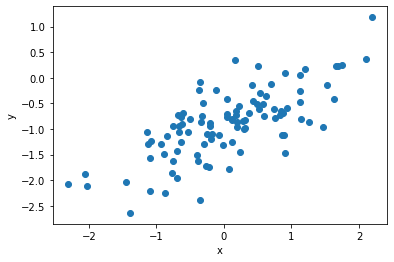

In [7]:
plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')

**(e)** Least Square Linear Model

In [8]:
model = sm.OLS.from_formula(formula='y ~ x', data=pd.DataFrame({'x':x, 'y':y})).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     107.0
Date:                Fri, 11 Feb 2022   Prob (F-statistic):           2.20e-17
Time:                        16:45:36   Log-Likelihood:                -65.124
No. Observations:                 100   AIC:                             134.2
Df Residuals:                      98   BIC:                             139.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9265      0.047    -19.717      0.0

$\hat\beta_0$ and $\hat\beta_1$ are close to real $\beta$ although slope is a bit higher and intercept is also a bit higher



**(f)** plot with least square line


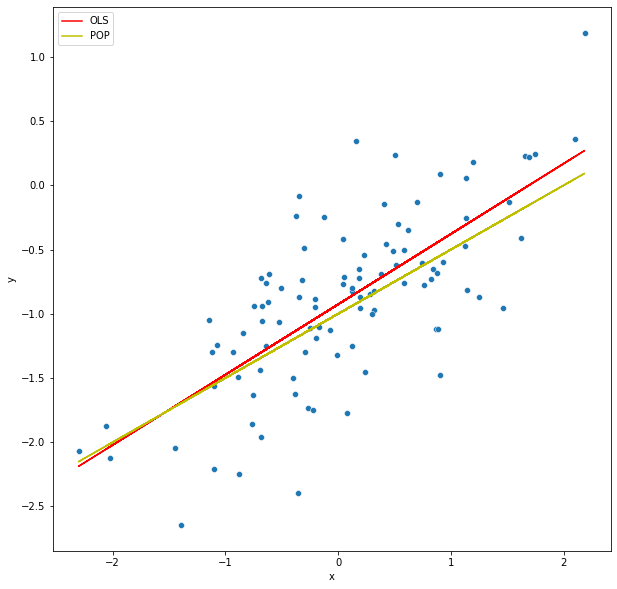

In [9]:
pred = model.predict()
true  = -1+(0.5*x)
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x=x, y=y)
plt.xlabel('x')
plt.ylabel('y')
ax.plot(x, pred, color='r')
ax.plot(x, -1+(0.5*x), color='y')
ax.legend(['OLS', 'POP']);

**(g)** fit a polynomial regression model 

In [10]:
model = sm.OLS.from_formula(formula='y ~ x+np.square(x)', data=pd.DataFrame({'x':x, 'y':y})).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     52.96
Date:                Fri, 11 Feb 2022   Prob (F-statistic):           2.83e-16
Time:                        16:45:45   Log-Likelihood:                -65.107
No. Observations:                 100   AIC:                             136.2
Df Residuals:                      97   BIC:                             144.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.9325      0.058    -16.158   

From the summary above, the quadratic term has a coefficient close to 0. Moreover, the t value is not significant. Thus, the improvement is not statistically significant

**(h)**

Let us decrease the variance of *eps* to 0.01, which means standard deviation is 0.1

Text(0, 0.5, 'y')

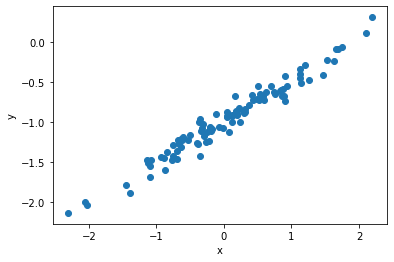

In [11]:
np.random.seed(1)
x = np.random.randn(100)
eps = np.random.normal(0, 0.1, 100)
y = -1 + 0.5*x + eps
plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')

In [12]:
model = sm.OLS.from_formula(formula='y ~ x', data=pd.DataFrame({'x':x, 'y':y})).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     2314.
Date:                Fri, 11 Feb 2022   Prob (F-statistic):           5.58e-70
Time:                        16:46:11   Log-Likelihood:                 95.820
No. Observations:                 100   AIC:                            -187.6
Df Residuals:                      98   BIC:                            -182.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9853      0.009   -104.844      0.0

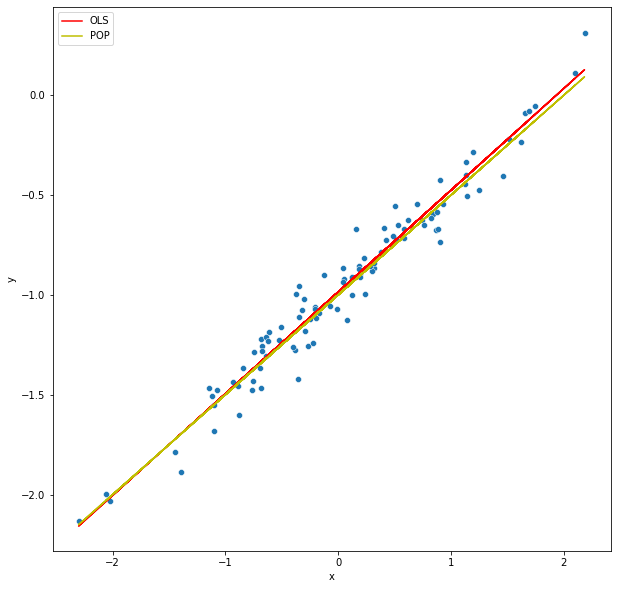

In [13]:
pred = model.predict()
true  = -1+(0.5*x)
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x=x, y=y)
plt.xlabel('x')
plt.ylabel('y')
ax.plot(x, pred, color='r')
ax.plot(x, -1+(0.5*x), color='y')
ax.legend(['OLS', 'POP']);

In [14]:
model = sm.OLS.from_formula(formula='y ~ x+np.square(x)', data=pd.DataFrame({'x':x, 'y':y})).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     1146.
Date:                Fri, 11 Feb 2022   Prob (F-statistic):           3.32e-68
Time:                        16:46:21   Log-Likelihood:                 95.837
No. Observations:                 100   AIC:                            -185.7
Df Residuals:                      97   BIC:                            -177.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.9865      0.012    -85.468   

From above repetition, if we decrease the variance of eps, the estimation would be much more accurate to truth. The increased R square and the closer of two lines both prove this.

**(i)**

Increase the variance of eps to 1

Text(0, 0.5, 'y')

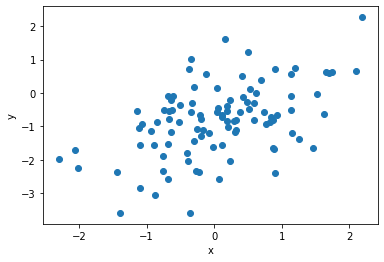

In [232]:
np.random.seed(1)
x = np.random.randn(100)
eps = np.random.randn(100)
y = -1 + 0.5*x + eps
plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')

In [233]:
model = sm.OLS.from_formula(formula='y ~ x', data=pd.DataFrame({'x':x, 'y':y})).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     31.60
Date:                Wed, 09 Feb 2022   Prob (F-statistic):           1.79e-07
Time:                        21:42:44   Log-Likelihood:                -134.44
No. Observations:                 100   AIC:                             272.9
Df Residuals:                      98   BIC:                             278.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.8530      0.094     -9.076      0.0

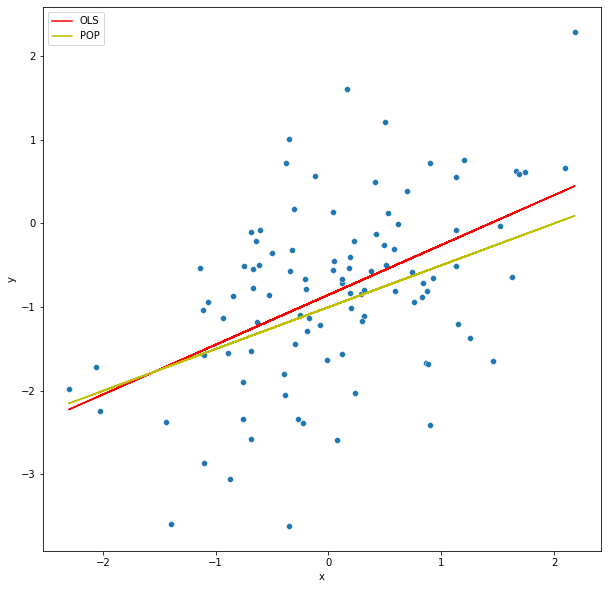

In [234]:
pred = model.predict()
true  = -1+(0.5*x)
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x=x, y=y)
plt.xlabel('x')
plt.ylabel('y')
ax.plot(x, pred, color='r')
ax.plot(x, -1+(0.5*x), color='y')
ax.legend(['OLS', 'POP']);

In [235]:
model = sm.OLS.from_formula(formula='y ~ x+np.square(x)', data=pd.DataFrame({'x':x, 'y':y})).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.228
Method:                 Least Squares   F-statistic:                     15.66
Date:                Wed, 09 Feb 2022   Prob (F-statistic):           1.28e-06
Time:                        21:43:23   Log-Likelihood:                -134.42
No. Observations:                 100   AIC:                             274.8
Df Residuals:                      97   BIC:                             282.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.8650      0.115     -7.494   

From above repetition, if we increase the variance of eps, the estimation would be much more **inaccurate** to truth. The decreased R square and the further of two lines both prove this.

**(j)**

Confidence Intervals (0.025-0.975)

**1. Original Dataset**

$\hat\beta_0$: [-1.020, -0.833]

$\hat\beta_1$: [0.443, 0.653]

**2. Less Noisy Dataset**

$\hat\beta_0$: [-1.004, -0.967]

$\hat\beta_1$: [0.489, 0.531]

**3. More Noisy Dataset**

$\hat\beta_0$: [-1.039, -0.666]

$\hat\beta_1$: [0.385, 0.806]

**Conclusion**: When Noise increases, the uncertainty of coefficient estimation increases as well

### Problem 4 Naive Bayes


**(a)** Fit a Bayes Classifier

In [18]:
spam = pd.read_csv('spam.csv')

In [19]:
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2171 entries, 0 to 2170
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   isuid        2171 non-null   int64  
 1   id           2171 non-null   int64  
 2   day of week  2171 non-null   object 
 3   time of day  2171 non-null   int64  
 4   size.kb      2171 non-null   int64  
 5   box          2171 non-null   object 
 6   domain       2171 non-null   object 
 7   local        2171 non-null   object 
 8   digits       2171 non-null   int64  
 9   name         2171 non-null   object 
 10  cappct       2171 non-null   float64
 11  special      2171 non-null   int64  
 12  credit       2171 non-null   object 
 13  sucker       2171 non-null   object 
 14  porn         2171 non-null   object 
 15  chain        2171 non-null   object 
 16  username     2171 non-null   object 
 17  large text   2171 non-null   object 
 18  spampct      818 non-null    float64
 19  catego

Firstly, because spampct has so many missing values, drop it

In [20]:
spam = spam.drop(['spampct'], axis = 1)

Encoding Categorical Variables

In [21]:
from sklearn.preprocessing import OrdinalEncoder
#Encode day of week
l = OrdinalEncoder().fit(spam[['day of week']])
spam['day of week'] = l.transform(spam[['day of week']])

In [22]:
#One Hot Encoding other variable 
train = pd.get_dummies(spam)

In [27]:
#drop one response variable
train = train.drop(['spam_no'], axis = 1)
train

,isuid,id,day of week,time of day,size.kb,digits,cappct,special,box_no,box_yes,...,chain_yes,username_no,username_yes,large text_no,large text_yes,category_com,category_list,category_news,category_ord,spam_yes
0,1,1,4.0,0,7,0,0.193548,1,1,0,...,0,1,0,1,0,0,0,1,0,0
1,1,2,4.0,0,2,0,0.191489,5,1,0,...,0,1,0,1,0,1,0,0,0,1
2,1,3,4.0,14,3,0,0.074074,2,1,0,...,1,1,0,1,0,0,1,0,0,0
3,1,4,4.0,3,3,0,0.200000,0,0,1,...,0,1,0,1,0,0,0,0,1,0
4,1,5,4.0,3,4,0,0.434783,2,1,0,...,0,1,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2166,19,96,0.0,10,5,0,0.750000,1,1,0,...,0,1,0,1,0,0,0,0,1,0
2167,19,97,3.0,15,192,0,0.000000,0,0,1,...,0,1,0,1,0,0,0,0,1,0
2168,19,98,3.0,15,85,0,0.070000,0,0,1,...,0,1,0,1,0,0,0,0,1,0
2169,19,99,5.0,13,4,0,0.000000,0,0,1,...,0,1,0,1,0,0,0,0,1,0


Then fit the Naive Bayes Model

In [28]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.iloc[:,:-1],train.iloc[:,-1],random_state = 42)

In [31]:
#Fit Gaussian Naive Bayes
X_train

,isuid,id,day of week,time of day,size.kb,digits,cappct,special,box_no,box_yes,...,chain_no,chain_yes,username_no,username_yes,large text_no,large text_yes,category_com,category_list,category_news,category_ord
1765,15,130,3.0,5,1,0,0.000000,0,1,0,...,1,0,1,0,0,1,1,0,0,0
1814,16,33,6.0,2,3,0,0.000000,0,1,0,...,1,0,1,0,1,0,1,0,0,0
1379,11,110,0.0,23,3,0,0.150000,3,1,0,...,1,0,0,1,1,0,0,1,0,0
582,4,68,6.0,18,1,0,0.500000,1,0,1,...,1,0,1,0,1,0,0,0,0,1
344,2,213,5.0,1,41,0,0.230000,0,0,1,...,1,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,15,3,6.0,3,110,0,0.273000,0,0,1,...,1,0,1,0,1,0,0,1,0,0
1095,9,112,0.0,5,3,0,0.167000,5,0,1,...,1,0,1,0,1,0,0,1,0,0
1130,10,12,6.0,11,7,0,0.071429,0,0,1,...,1,0,1,0,1,0,0,0,0,1
1294,11,25,0.0,18,2,0,0.076923,0,0,1,...,1,0,1,0,1,0,0,1,0,0


In [32]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [36]:
#Training error
from sklearn.metrics import accuracy_score
train_err = 1 - accuracy_score(y_train, gnb.predict(X_train))
train_err

0.048525798525798525

In [37]:
#Generalization error
y_pred = gnb.predict(X_test)
gen_err = 1 - accuracy_score(y_test, y_pred)
gen_err

0.047882136279926324

We acheive perfect generalization error with 75% training data and 25% testing data

**(b)** Randomly assign 80% training and 20% testing 10 times

In [41]:
np.random.seed(100)

In [42]:
def split_train_test(data, test_ratio):
    index = np.random.permutation(len(data))
    test_size = int(len(data) * test_ratio)
    test_index = index[:test_size]
    train_index = index[test_size:]
    return data.iloc[train_index], data.iloc[test_index]

In [43]:
Etest = []
for i in range(10):
    train_data, test_data = split_train_test(train, 0.2)
    X_train = train_data.iloc[:,:-1]
    y_train = train_data.iloc[:,-1]
    X_test = test_data.iloc[:,:-1]
    y_test = test_data.iloc[:,-1]
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)
    y_pred = gnb.predict(X_test)
    Etest.append(1 - accuracy_score(y_test, y_pred))
print(Etest)

[0.03456221198156684, 0.03917050691244239, 0.04147465437788023, 0.04377880184331795, 0.048387096774193505, 0.05760368663594473, 0.04608294930875578, 0.055299539170506895, 0.04377880184331795, 0.05069124423963134]


In [44]:
Etest = np.array(Etest)
print(Etest.mean())
print(Etest.std())

0.04608294930875576
0.00675708677355538


From above process, even when we repeat the random train test split for ten times, the mean of testing error is very low, while standard deviation is also low. So we are relatively confident that the naive bayes would be a great model without overfitting

**(c)**

A spam classifier can have a type 1 error (false positive) or type 2 error (false negative). However, in different situations, they are not equal. For example, if we are trying to detect some dangerous things, we care more about false negative, because it would be very dangerous if we cannot classify a dangerous thing as 'dangerous'. **By contrast**, if we are distinguishing bad users for a social media, we may care about minimizing false positive rate beacause users may complain. 

Thus, we can adapt our naive Bayes to change loss function from accuracy to other metrics. For example, we can use precision-recall, or either precision or recall.

### Problem 5 and 6 are written by hand shown below

![problem 5](q5.jpg)

![problem 6](p5.jpg)